## Multiple Amplitude Matrices
Katherine Elder

When looking at the plots generated in the antenna matrix notebook, we noticed some patterns showing up in the delays. However, it was difficult to see everything that was going when only looking at one amplitude. To try and pick up more patterns, we split up the window of where we are looking for the amplitude peaks in the delay transforms. 

A lot of the maximum amplitudes fall at delay times corresponding to baselines. To look into that more, we find the maximum amplitude for each antenna pair within the window of delays which appear to be baseline dependent. Then we look at the amplitudes for everything that is not baseline dependent. 

### Part 1: Setting up notebook

The first thing we need to do is set up the notebook. This includes initializing variables and reading the uvfits files into uv objects. We also prompt the user to enter an antenna number they would like to look at. 

In [6]:
#Initialize matplotlib notebook
%matplotlib notebook
#Import needed packages
from pyuvdata import UVData
import numpy as np
import glob
import matplotlib.pyplot as plt
from matplotlib.colors import SymLogNorm
import matplotlib
#Import the functions I defined for this notebook
import amp_delay_plotting as adp

#Create uv elements
uvxy = UVData()
uvyx = UVData()
uvxx = UVData()
uvyy = UVData()

#Create constant variables

#Variable for the speed of light, with power adjusted for desired units
c = 0.299792
#Variable for speed of light in a cable correction factor, based on Google search
f = .83

#Create an array of antennas we want to flag
flagged_antennas = np.array([0,2,26,50,98,136])

In [7]:
#Read each of the data files into the corresponding uv object

# Read in the xy data file
uvxy.read_uvfits('/data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/xy_time_split_data/combined_files/zen.grp1.of1.xy.LST.run_7.uvOCRSL.uvfits')

# Read in the yx data file
uvyx.read_uvfits('/data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/yx_time_split_data/combined_files/zen.grp1.of1.yx.LST.run_8.uvOCRSL.uvfits')

#Read in the xx data file
uvxx.read_uvfits('/data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/xx_time_split_data/combined_files/zen.grp1.of1.xx.LST.run_2.uvOCRSL.uvfits')

#Read in the yy data file
uvyy.read_uvfits('/data6/HERA/data/IDR2.1/uvOCRSL_yy_time_split_data/combined_files/zen.grp1.of1.yy.LST.run_2.uvOCRSL.uvfits')

In [8]:
#Run a couple of checks to be sure that the files do have data in them

print "xy nsample mean:", np.mean(uvxy.nsample_array)
print "yx nsample mean:", np.mean(uvyx.nsample_array)
print "xx nsample mean:", np.mean(uvxx.nsample_array)
print "yy nsample mean:", np.mean(uvyy.nsample_array)

print 'xy flags mean:', np.mean(uvxy.flag_array)
print 'yx flags mean:', np.mean(uvyx.flag_array)
print 'xx flags mean:', np.mean(uvxx.flag_array)
print 'yy flags mean:', np.mean(uvyy.flag_array)

xy nsample mean: 30588.262
yx nsample mean: 30966.137
xx nsample mean: 31376.717
yy nsample mean: 25438.166
xy flags mean: 0.34827918065130625
yx flags mean: 0.34021793359941943
xx flags mean: 0.3296763028392598
yy flags mean: 0.3582007154843977


In [9]:
#Read in the position and antenna numbers for all antennas
#These will be passed into functions to plot the antennas in the correct positions
antpos, ants = uvxy.get_ENU_antpos()

In [10]:
#Prompt the user to input the desired antenna
focus_ant = input("Which antenna would you like to look at? Enter here: ")
#Take the input and represent as an integer
focus_ant = int(focus_ant)
#Run a check that the number is valid
focus_ant = adp.check_antnum(antnum = focus_ant, ants = ants)

Which antenna would you like to look at? Enter here: 88
88


### Part 2: XY Plots

We now have all the information we need to create and plot the matrices. We start with the xy polarized data.

#### Step 1: Baseline Dependent Plots

First, we will look at the baseline dependent amplitudes. These are the maximum amplitudes that fall within the distance of baseline. The longest baseline is ~120 m, so we narrow our window to only find amplitudes within 120 m on either side of the chosen antenna. 

We call the made_array function to create the arrays of amplitudes and delays. Then we call the make_matrix function to correctly format the arrays we just created so they can be plotted. Finally, we call the plot_matrix function and pass in all the required information to plot the matrix arrays. 

(1035, 3)
(1035, 3)
(45, 45)
(45, 45)


<IPython.core.display.Javascript object>


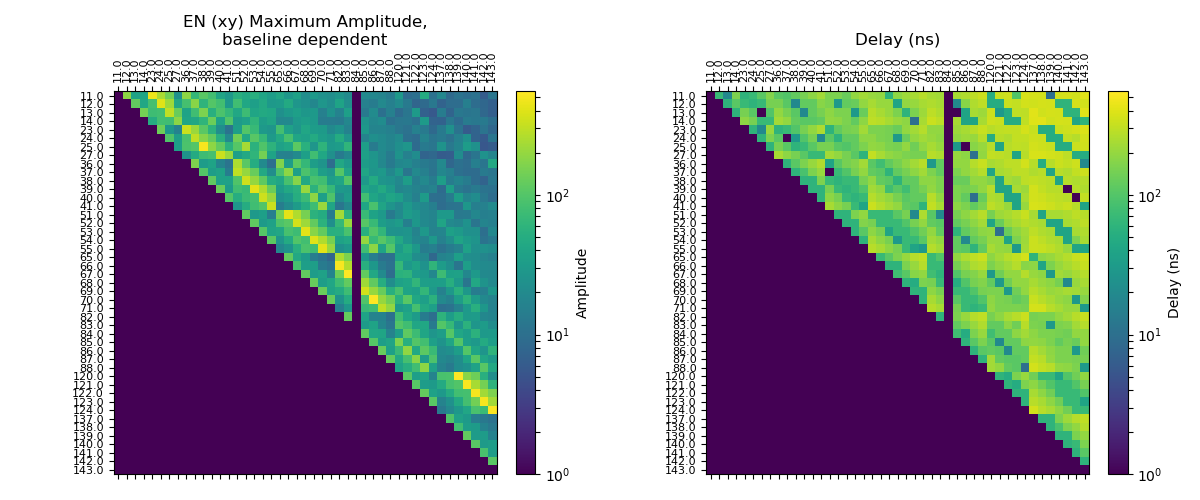

In [11]:
#Call the make_array functions to create the arrays for the baseline dependent amplitudes

#Create the arrays for the max amplitude and corresponding delay for the xy data
#The only parameter passed is the uv object
blin_amp_xy, blin_delay_xy = adp.make_blin_depd_arrays(uv = uvxy)

#Print the shape of the arrays to check that everything is working correctly
print blin_delay_xy.shape
print blin_amp_xy.shape

#Create the matrix arrays for the xy data
#The two arrays created above are passed into the function
blin_amp_matrix_xy, blin_delay_matrix_xy = adp.make_matrix_array(amp_array = blin_amp_xy, 
                                                                 delay_array = blin_delay_xy)

#Print the shape of the arrays to check that everything is working correctly
print blin_amp_matrix_xy.shape
print blin_delay_matrix_xy.shape

#The arrays created above are passed into the function
#The color scales for both plots are passed through vmin and vmax
#The title of the plot is specified
adp.plot_matrix_array(amp_array = blin_amp_xy, amp_matrix = blin_amp_matrix_xy, delay_matrix = blin_delay_matrix_xy,
                      vmin1 = 1, vmax1 = 550, vmin2 = 1, vmax2 = 550,
                      title = 'EN (xy) Maximum Amplitude,\nbaseline dependent')

Now that we have printed the matrix plots, we want to look at the antenna positions. 

We call the make_array functions to create the baseline dependent arrays, with the correct formatting to properly plot the physical positions of the antennas. We call the plot_position function to take the arrays we just created and plot them. 

This allows us to easily see how the physical distance between antennas affects the amplitude and delay. 

<IPython.core.display.Javascript object>


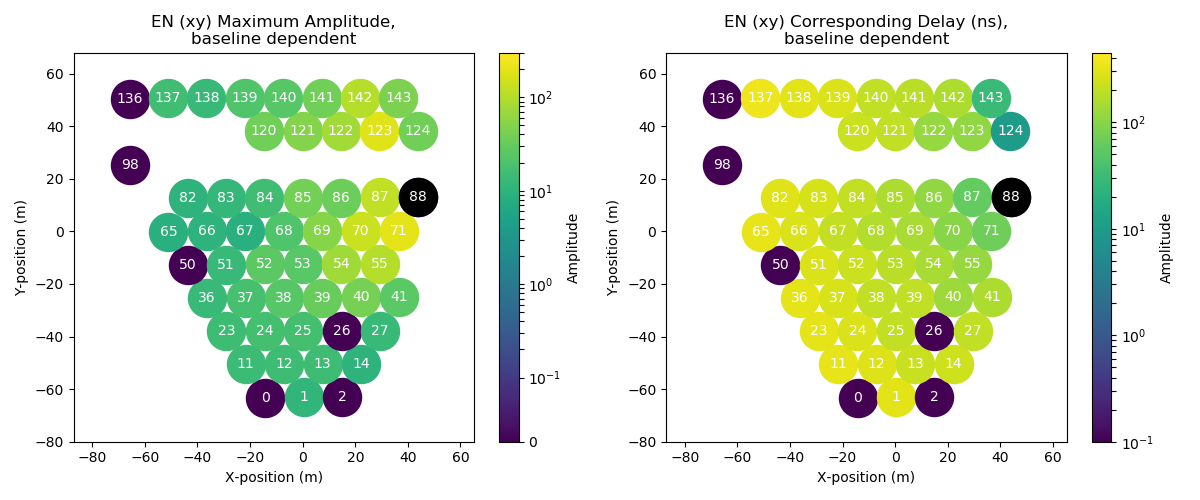

In [12]:
#Create the arrays for the maximum values and the matrix for xy, then plot

#Create the arrays for the max amplitude and corresponding delay for the xy data
#The parameters passed are the uv object and setting keep_flags to True
#By setting keep_flags to True, we keep the flagged antennas listed in the created array,
#which means we are able to plot them in position below
full_ant_amp_xy, full_ant_delay_xy = adp.make_blin_depd_arrays(uv = uvxy, keep_flags = True)

#Create the matrix arrays for the xy data
#The two arrays created above are passed into the function
#The antenna entered by the user is passed in
#Index is set to true, which means the array index numbers for the given antenna are returned
#index = index number for the amplitude array
#dindex = index number for the delay array
blin_ants_amp_xy, blin_ants_delay_xy, index, dindex = adp.make_matrix_array(amp_array = full_ant_amp_xy, 
                                                                            delay_array = full_ant_delay_xy, 
                                                                            antnum = focus_ant, index = True)
#The arrays created above are passed into the function
#The index and delay index values are passed
#The uv object is passed along with the entered antenna number
#The color scales for for both plots are passed through vmin and vmax
#The titles of the plots are specified
adp.plot_position_array(amp_array = blin_ants_amp_xy, delay_array = blin_ants_delay_xy, 
                        index = index, dindex = dindex, uv = uvxy, antnum = focus_ant,
                        vmin1 = 0, vmax1 = 300, 
                        vmin2 = 0.1, vmax2 = 450, 
                        title1 = 'EN (xy) Maximum Amplitude,\nbaseline dependent',
                        title2 = 'EN (xy) Corresponding Delay (ns),\nbaseline dependent')

#### Step 2: Baseline Independent

We've been able to isolate the amplitudes that are baseline dependent, now it's time to look at everything else. 

We repeat the same plots as above, but this time we use windows on either side of the baseline dependent delays to see what the amplitudes are. 

(1035, 3)
(1035, 3)
(45, 45)
(45, 45)


<IPython.core.display.Javascript object>


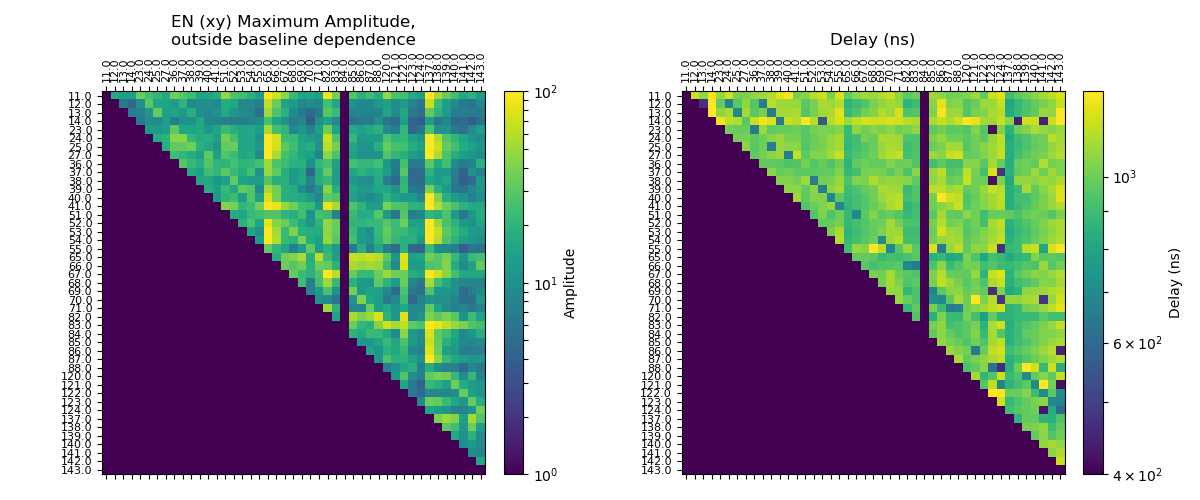

In [13]:
#Initialize the arrays for the baseline independent amplitudes of the xy data and the corresponding delay
#The only parameter passed is the uv object
ind_amp_xy, ind_delay_xy = adp.make_blin_ind_arrays(uv = uvxy)

#Print the shape of the arrays to verify that the function worked properly
print ind_delay_xy.shape
print ind_amp_xy.shape

#Initialize the matrix arrays of the xy data
#The arrays created above are passed into the function 
ind_amp_matrix_xy, ind_delay_matrix_xy = adp.make_matrix_array(amp_array = ind_amp_xy, delay_array = ind_delay_xy)

#Print the shape of the arrays to verify that the function worked properly
print ind_amp_matrix_xy.shape
print ind_delay_matrix_xy.shape

#The arrays created above are passed into the function
#The color scales for both plots are passed through vmin and vmax
#The title of the plot is specified
adp.plot_matrix_array(amp_array = ind_amp_xy, amp_matrix = ind_amp_matrix_xy, delay_matrix = ind_delay_matrix_xy,
                      vmin1 = 1, vmax1 = 100,
                      vmin2 = 400, vmax2 = 1300,
                      title = 'EN (xy) Maximum Amplitude,\noutside baseline dependence')

<IPython.core.display.Javascript object>


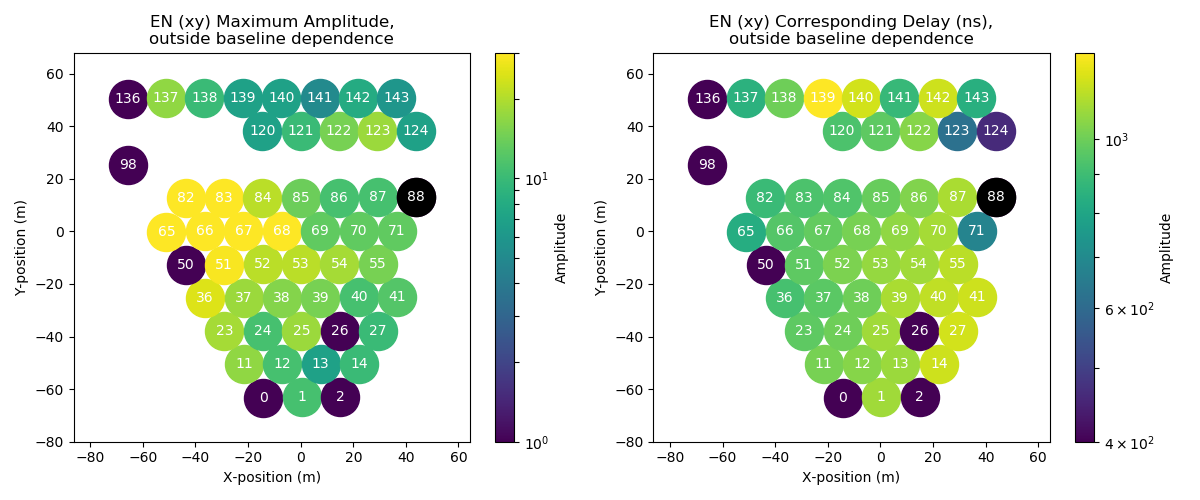

In [14]:
#Create the arrays for the max amplitude and corresponding delay for the baseline independent xy data
#The parameters passed are the uv object and setting keep_flags to True
#By setting keep_flags to True, we keep the flagged antennas listed in the created array,
#which means we are able to plot them in position below
full_ant_ind_amp_xy, full_ant_ind_delay_xy = adp.make_blin_ind_arrays(uv = uvxy, keep_flags=True)

#Create the matrix arrays for the xy data
#The two arrays created above are passed into the function
#The antenna entered by the user is passed in
#Index is set to true, which means the array index numbers for the given antenna are returned
#index = index number for the amplitude array
#dindex = index number for the delay array
ind_ants_amp_xy, ind_ants_delay_xy, index_ind, dindex_ind = adp.make_matrix_array(amp_array = full_ant_ind_amp_xy, 
                                                                                  delay_array = full_ant_ind_delay_xy, 
                                                                                  antnum = focus_ant, 
                                                                                  index = True)

#The arrays created above are passed into the function
#The index and delay index values are passed
#The uv object is passed along with the entered antenna number
#The color scales for for both plots are passed through vmin and vmax
#The titles of the plots are specified
adp.plot_position_array(amp_array = ind_ants_amp_xy, delay_array = ind_ants_delay_xy,
                        index = index_ind, dindex = dindex_ind, uv = uvxy, antnum = focus_ant,
                        vmin1 = 1, vmax1 = 30,
                        vmin2 = 400, vmax2 = 1300, 
                        title1 = 'EN (xy) Maximum Amplitude,\noutside baseline dependence',
                        title2 = 'EN (xy) Corresponding Delay (ns),\noutside baseline dependence')

#### Step 3: Delay Distance Plots

The position plots are very helpful in recognizing patterns based on physical distances. However, the delay times seem to be implying more patterns that are hard to recognize as they are currently plotted. 

To get a better idea of what is going on with the delays, we will plot the delay in meters verses the baseline distance in meters. Now we will be able to see how far away the antenna is physically as well as how far the signal actually traveled. The color scale will be the amplitude. 

We plot the baseline dependent data next to the baseline independent data. 

<IPython.core.display.Javascript object>


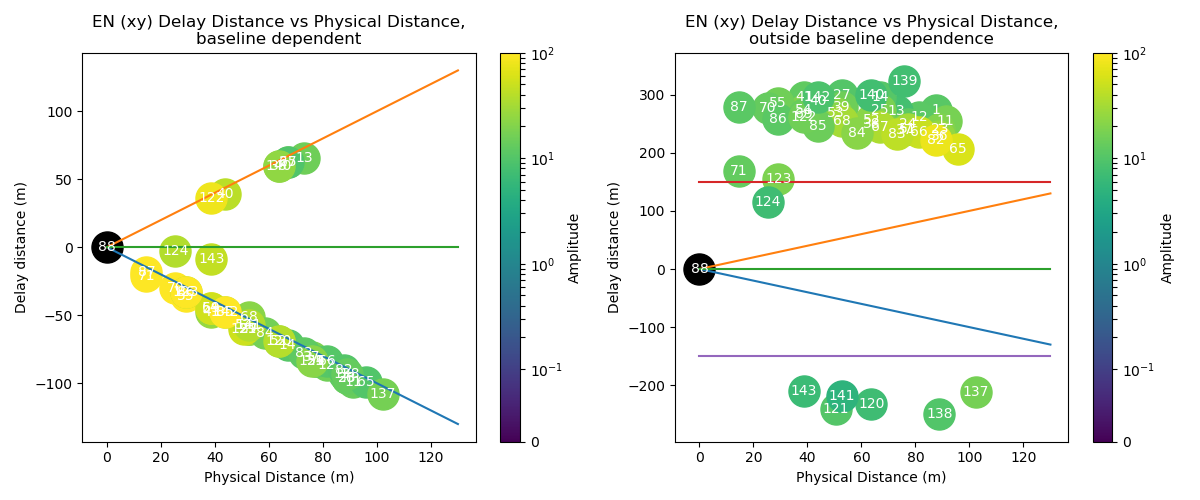

In [15]:
#Create an array which holds the baseline dependent delay times in meters
blin_delay_distance = blin_ants_delay_xy * c
#Create an array which holds the baseline independent delay times in meters
ind_delay_distance = ind_ants_delay_xy * c * f

#The arrays created above are passed into the function along with the amplitude array
#The index values are passed, along with the entered antenna number and uv object
#The color scales for both plots are passed through vmin and vmax
#The titles of the plots are specified
adp.plot_delay_position(amp_1 = blin_ants_amp_xy, delay_dis_1 = blin_delay_distance,
                        amp_2 = ind_ants_amp_xy, delay_dis_2 = ind_delay_distance,
                        index1 = index, index2 = index_ind, uv = uvxy, antnum = focus_ant,
                        vmin1 = 0, vmax1 = 100, 
                        vmin2 = 0, vmax2 = 100,
                        title1 = 'EN (xy) Delay Distance vs Physical Distance,\nbaseline dependent',
                        title2 = 'EN (xy) Delay Distance vs Physical Distance,\noutside baseline dependence')

### Part 3: YX Plots

Now we repeat all of the steps above for the yx data.

(1035, 3)
(1035, 3)
(45, 45)
(45, 45)


<IPython.core.display.Javascript object>


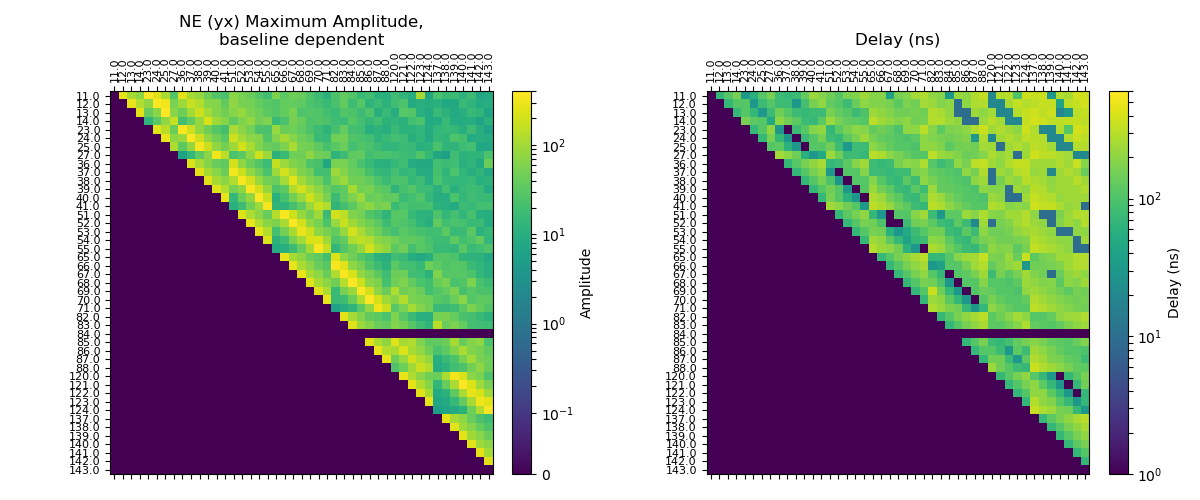

In [16]:
#Call the make_array functions to create the arrays for the baseline dependent amplitudes 

#Create the arrays for the max amplitude and corresponding delay for the yx data
#The only parameter passed is the uv object
blin_amp_yx, blin_delay_yx = adp.make_blin_depd_arrays(uv = uvyx)

#Print the shape of the arrays to check that everything is working correctly
print blin_delay_yx.shape
print blin_amp_yx.shape

#Create the matrix arrays for the yx data
#The two arrays created above are passed into the function
blin_amp_matrix_yx, blin_delay_matrix_yx = adp.make_matrix_array(amp_array = blin_amp_yx, 
                                                                 delay_array = blin_delay_yx)

#Print the shape of the arrays to check that everything is working correctly
print blin_amp_matrix_yx.shape
print blin_delay_matrix_yx.shape

#The arrays created above are passed into the function
#The color scales for both plots are passed through vmin and vmax
#The title of the plot is specified
adp.plot_matrix_array(amp_array = blin_amp_yx, amp_matrix = blin_amp_matrix_yx, delay_matrix = blin_delay_matrix_yx,
                      vmin1 = 0, vmax1 = 400,
                      vmin2 = 1, vmax2 = 600, 
                      title = 'NE (yx) Maximum Amplitude,\nbaseline dependent')

<IPython.core.display.Javascript object>


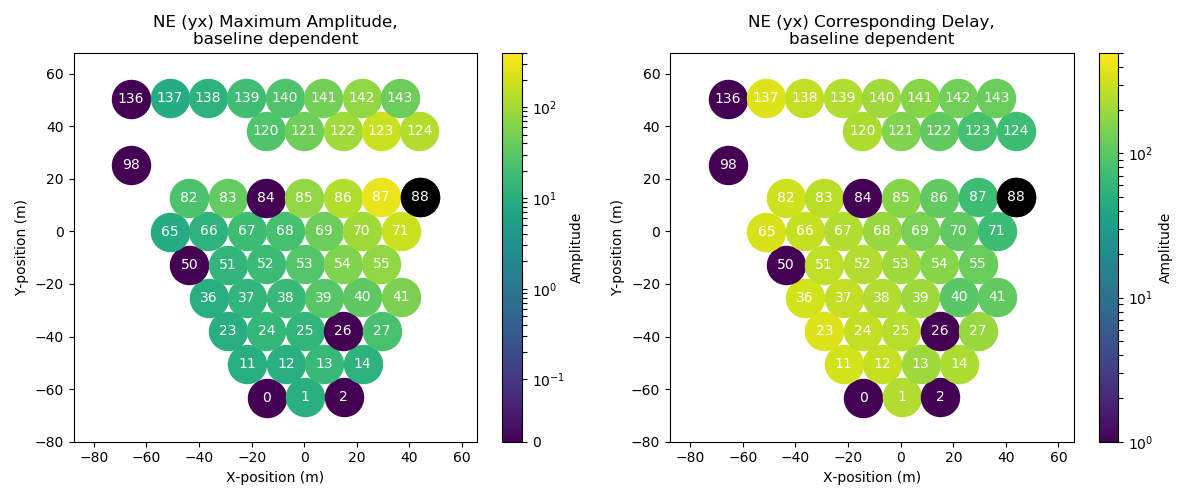

In [17]:
#Create the arrays for the maximum values and the matrix for yx, then plot

#Create the arrays for the max amplitude and corresponding delay for the yx data
#The parameters passed are the uv object and setting keep_flags to True
#By setting keep_flags to True, we keep the flagged antennas listed in the created array,
#which means we are able to plot them in position below
full_ant_amp_yx, full_ant_delay_yx = adp.make_blin_depd_arrays(uv = uvyx, keep_flags=True)

#Create the matrix arrays for the yx data
#The two arrays created above are passed into the function
#The antenna entered by the user is passed in
#Index is set to true, which means the array index numbers for the given antenna are returned
#index = index number for the amplitude array
#dindex = index number for the delay array
blin_ants_amp_yx, blin_ants_delay_yx, indeyx, dindeyx = adp.make_matrix_array(amp_array = full_ant_amp_yx, 
                                                                              delay_array=full_ant_delay_yx, 
                                                                              antnum = focus_ant, index = True)

#The arrays created above are passed into the function
#The index and delay index values are passed
#The uv object is passed along with the entered antenna number
#The color scales for for both plots are passed through vmin and vmax
#The titles of the plots are specified
adp.plot_position_array(amp_array = blin_ants_amp_yx, delay_array = blin_ants_delay_yx,
                        index = indeyx, dindex = dindeyx, uv = uvyx, antnum = focus_ant,
                        vmin1 = 0, vmax1 = 400,
                        vmin2 = 1, vmax2 = 500, 
                        title1 = 'NE (yx) Maximum Amplitude,\nbaseline dependent',
                        title2 = 'NE (yx) Corresponding Delay,\nbaseline dependent')

(1035, 3)
(1035, 3)
(45, 45)
(45, 45)


<IPython.core.display.Javascript object>


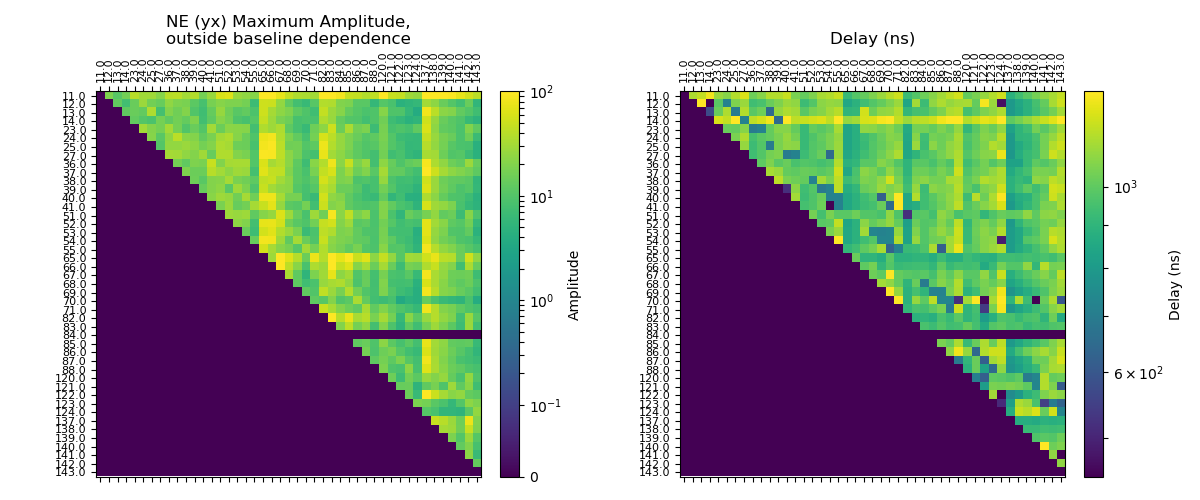

In [18]:
#Initialize the arrays for the baseline independent amplitudes of the yx data and the corresponding delay
#The only parameter passed is the uv object
ind_amp_yx, ind_delay_yx = adp.make_blin_ind_arrays(uv = uvyx)

#Print the shape of the arrays to verify that the function worked properly
print ind_delay_yx.shape
print ind_amp_yx.shape

#Initialize the matrix arrays of the yx data
#The arrays created above are passed into the function 
ind_amp_matrix_yx, ind_delay_matrix_yx = adp.make_matrix_array(amp_array = ind_amp_yx, delay_array = ind_delay_yx)

#Print the shape of the arrays to verify that the function worked properly
print ind_amp_matrix_yx.shape
print ind_delay_matrix_yx.shape

#The arrays created above are passed into the function
#The color scales for both plots are passed through vmin and vmax
#The title of the plot is specified
adp.plot_matrix_array(amp_array = ind_amp_yx, amp_matrix = ind_amp_matrix_yx, delay_matrix = ind_delay_matrix_yx,
                      vmin1 = 0, vmax1 = 100,
                      vmin2 = 450, vmax2 = 1300, 
                      title = 'NE (yx) Maximum Amplitude,\noutside baseline dependence')

<IPython.core.display.Javascript object>


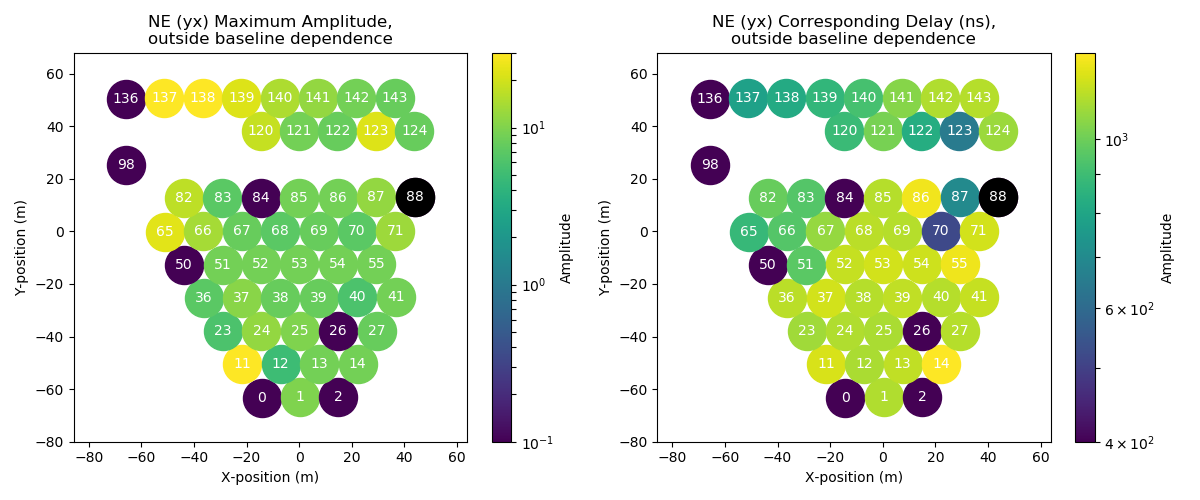

In [19]:
#Create the arrays for the max amplitude and corresponding delay for the baseline independent yx data
#The parameters passed are the uv object and setting keep_flags to True
#By setting keep_flags to True, we keep the flagged antennas listed in the created array,
#which means we are able to plot them in position below
full_ant_ind_amp_yx, full_ant_ind_delay_yx = adp.make_blin_ind_arrays(uv = uvyx, keep_flags=True)

#Create the matrix arrays for the yx data
#The two arrays created above are passed into the function
#The antenna entered by the user is passed in
#Index is set to true, which means the array index numbers for the given antenna are returned
#index = index number for the amplitude array
#dindex = index number for the delay array
ind_ants_amp_yx, ind_ants_delay_yx, indeyx_ind, dindeyx_ind = adp.make_matrix_array(amp_array = full_ant_ind_amp_yx, 
                                                                                    delay_array = full_ant_ind_delay_yx, 
                                                                                    antnum = focus_ant, index = True)

#The arrays created above are passed into the function
#The index and delay index values are passed
#The uv object is passed along with the entered antenna number
#The color scales for for both plots are passed through vmin and vmax
#The titles of the plots are specified
adp.plot_position_array(amp_array = ind_ants_amp_yx, delay_array = ind_ants_delay_yx,
                        index = indeyx_ind, dindex = dindeyx_ind, uv = uvyx, antnum = focus_ant,
                        vmin1 = .1, vmax1 = 30,
                        vmin2 = 400, vmax2 = 1300, 
                        title1 = 'NE (yx) Maximum Amplitude,\noutside baseline dependence',
                        title2 = 'NE (yx) Corresponding Delay (ns),\noutside baseline dependence')

<IPython.core.display.Javascript object>


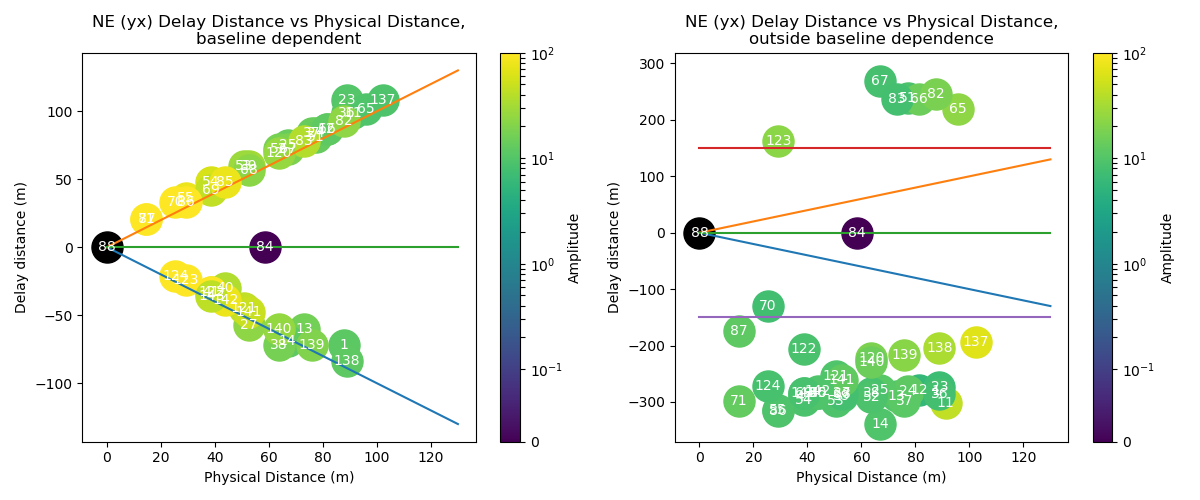

In [20]:
#Create an array which holds the baseline dependent delay times in meters
blin_delay_distance_yx = blin_ants_delay_yx * c

#Create an array which holds the baseline independent delay times in meters
ind_delay_distance_yx = ind_ants_delay_yx * c * f

#The arrays created above are passed into the function along with the amplitude array
#The index values are passed, along with the entered antenna number and uv object
#The color scales for both plots are passed through vmin and vmax
#The titles of the plots are specified
adp.plot_delay_position(amp_1 = blin_ants_amp_yx, delay_dis_1 = blin_delay_distance_yx,
                        amp_2 = ind_ants_amp_yx, delay_dis_2 = ind_delay_distance_yx,
                        index1 = indeyx, index2 = indeyx_ind, uv = uvyx, antnum = focus_ant,
                        vmin1 = 0, vmax1 = 100,
                        vmin2 = 0, vmax2 = 100,
                        title1 = 'NE (yx) Delay Distance vs Physical Distance,\nbaseline dependent',
                        title2 = 'NE (yx) Delay Distance vs Physical Distance,\noutside baseline dependence')


### Part 4: XX Plots

(1035, 3)
(1035, 3)
(45, 45)
(45, 45)


<IPython.core.display.Javascript object>


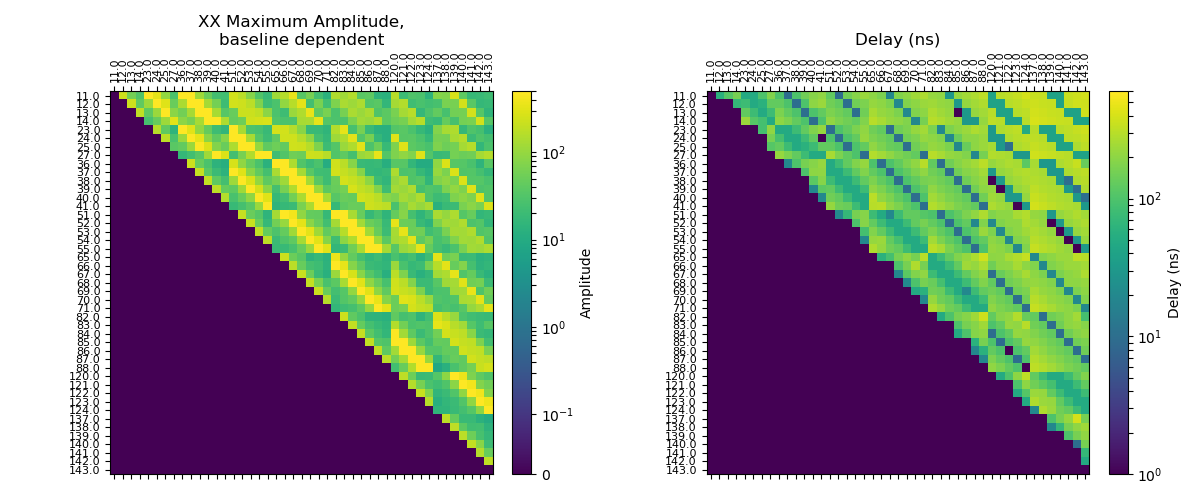

In [21]:
#Call the make_array functions to create the arrays for the baseline dependent amplitudes

#Create the arrays for the max amplitude and corresponding delay for the xx data
#The only parameter passed is the uv object
blin_amp_xx,blin_delay_xx = adp.make_blin_depd_arrays(uv = uvxx)

#Print the shape of the arrays to check that everything is working correctly
print blin_delay_xx.shape
print blin_amp_xx.shape

#Create the matrix arrays for the xx data
#The two arrays created above are passed into the function
blin_amp_matrix_xx, blin_delay_matrix_xx = adp.make_matrix_array(amp_array = blin_amp_xx, 
                                                                 delay_array = blin_delay_xx)

#Print the shape of the arrays to check that everything is working correctly
print blin_amp_matrix_xx.shape
print blin_delay_matrix_xx.shape

#The arrays created above are passed into the function
#The color scales for both plots are passed through vmin and vmax
#The title of the plot is specified
adp.plot_matrix_array(amp_array = blin_amp_xx, amp_matrix=blin_amp_matrix_xx, delay_matrix = blin_delay_matrix_xx,
                      vmin1 = 0, vmax1 = 500,
                      vmin2 = 1, vmax2 = 600, 
                      title = 'XX Maximum Amplitude,\nbaseline dependent')

<IPython.core.display.Javascript object>


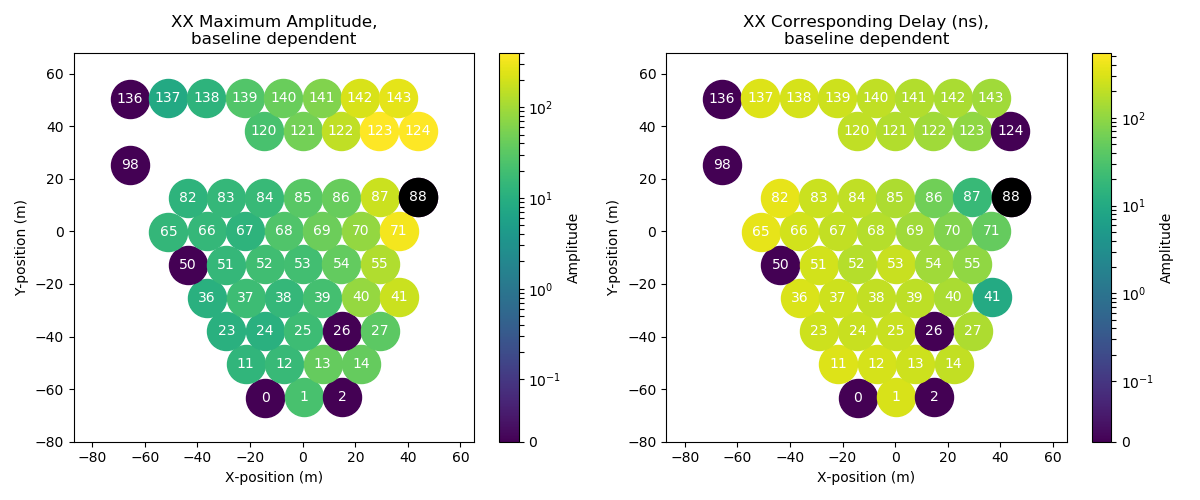

In [22]:
#Create the arrays for the maximum values and the matrix for xx, then plot

#Create the arrays for the max amplitude and corresponding delay for the xx data
#The parameters passed are the uv object and setting keep_flags to True
#By setting keep_flags to True, we keep the flagged antennas listed in the created array,
#which means we are able to plot them in position below
full_ant_amp_xx, full_ant_delay_xx = adp.make_blin_depd_arrays(uv = uvxx, keep_flags=True)

#Create the matrix arrays for the xx data
#The two arrays created above are passed into the function
#The antenna entered by the user is passed in
#Index is set to true, which means the array index numbers for the given antenna are returned
#index = index number for the amplitude array
#dindex = index number for the delay array
blin_ants_amp_xx, blin_ants_delay_xx, indexx, dindexx = adp.make_matrix_array(amp_array = full_ant_amp_xx, 
                                                                              delay_array = full_ant_delay_xx, 
                                                                              antnum = focus_ant, index = True)

#The arrays created above are passed into the function
#The index and delay index values are passed
#The uv object is passed along with the entered antenna number
#The color scales for for both plots are passed through vmin and vmax
#The titles of the plots are specified
adp.plot_position_array(amp_array = blin_ants_amp_xx, delay_array = blin_ants_delay_xx, 
                        index = indexx, dindex = dindexx, uv = uvxx, antnum = focus_ant,
                        vmin1 = 0, vmax1 = 400,
                        vmin2 = 0, vmax2 = 550,  
                        title1 = 'XX Maximum Amplitude,\nbaseline dependent',
                        title2 = 'XX Corresponding Delay (ns),\nbaseline dependent')

(1035, 3)
(1035, 3)
(45, 45)
(45, 45)


<IPython.core.display.Javascript object>


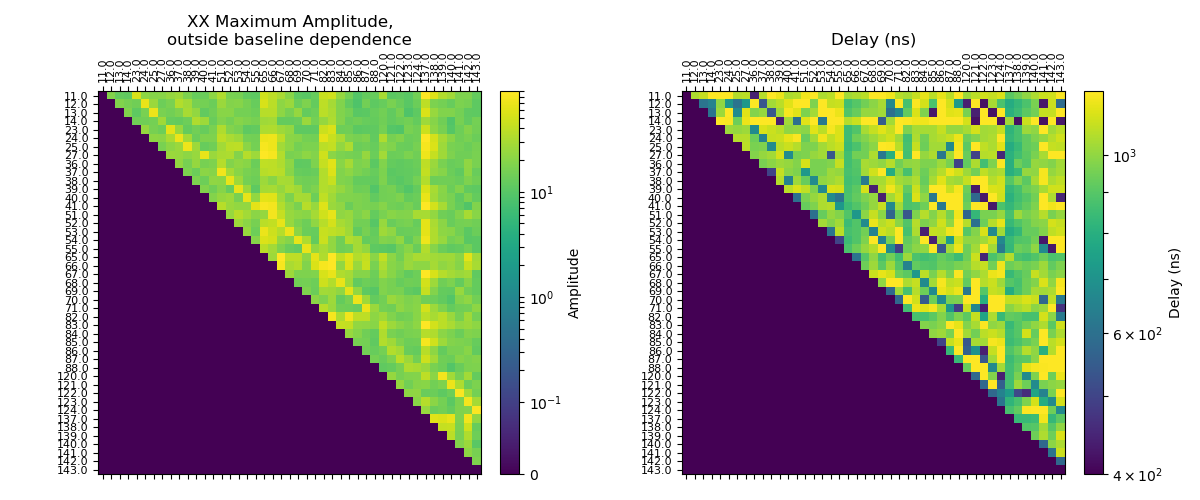

In [23]:
#Initialize the arrays for the baseline independent amplitudes of the xx data and the corresponding delay
#The only parameter passed is the uv object
ind_amp_xx, ind_delay_xx = adp.make_blin_ind_arrays(uv = uvxx)

#Print the shape of the arrays to verify that the function worked properly
print ind_delay_xx.shape
print ind_amp_xx.shape

#Initialize the matrix arrays of the xx data
#The arrays created above are passed into the function 
ind_amp_matrix_xx, ind_delay_matrix_xx = adp.make_matrix_array(amp_array = ind_amp_xx, delay_array = ind_delay_xx)

#Print the shape of the arrays to verify that the function worked properly
print ind_amp_matrix_xx.shape
print ind_delay_matrix_xx.shape

#The arrays created above are passed into the function
#The color scales for both plots are passed through vmin and vmax
#The title of the plot is specified
adp.plot_matrix_array(amp_array = ind_amp_xx, amp_matrix = ind_amp_matrix_xx, delay_matrix = ind_delay_matrix_xx,
                      vmin1 = 0, vmax1 = 90,
                      vmin2 = 400, vmax2 = 1200, 
                      title = 'XX Maximum Amplitude,\noutside baseline dependence')

<IPython.core.display.Javascript object>


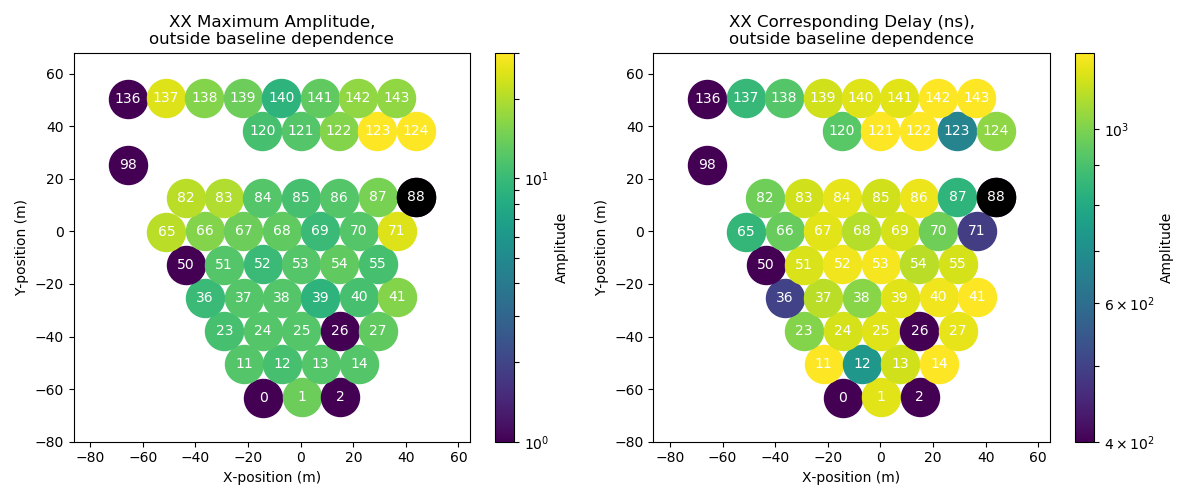

In [24]:
#Create the arrays for the max amplitude and corresponding delay for the baseline independent xx data
#The parameters passed are the uv object and setting keep_flags to True
#By setting keep_flags to True, we keep the flagged antennas listed in the created array,
#which means we are able to plot them in position below
full_ant_ind_amp_xx, full_ant_ind_delay_xx = adp.make_blin_ind_arrays(uv = uvxx, keep_flags=True)

#Create the matrix arrays for the xx data
#The two arrays created above are passed into the function
#The antenna entered by the user is passed in
#Index is set to true, which means the array index numbers for the given antenna are returned
#index = index number for the amplitude array
#dindex = index number for the delay array
ind_ants_amp_xx, ind_ants_delay_xx, indexx_ind, dindexx_ind = adp.make_matrix_array(amp_array = full_ant_ind_amp_xx,
                                                                                    delay_array = full_ant_ind_delay_xx, 
                                                                                    antnum = focus_ant, index = True)

#The arrays created above are passed into the function
#The index and delay index values are passed
#The uv object is passed along with the entered antenna number
#The color scales for for both plots are passed through vmin and vmax
#The titles of the plots are specified
adp.plot_position_array(amp_array = ind_ants_amp_xx, delay_array = ind_ants_delay_xx,
                        index = indexx_ind, dindex = dindexx_ind, uv = uvxx, antnum = focus_ant,
                        vmin1 = 1, vmax1 = 30,
                        vmin2 = 400, vmax2 = 1250,  
                        title1 = 'XX Maximum Amplitude,\noutside baseline dependence',
                        title2 = 'XX Corresponding Delay (ns),\noutside baseline dependence')

<IPython.core.display.Javascript object>


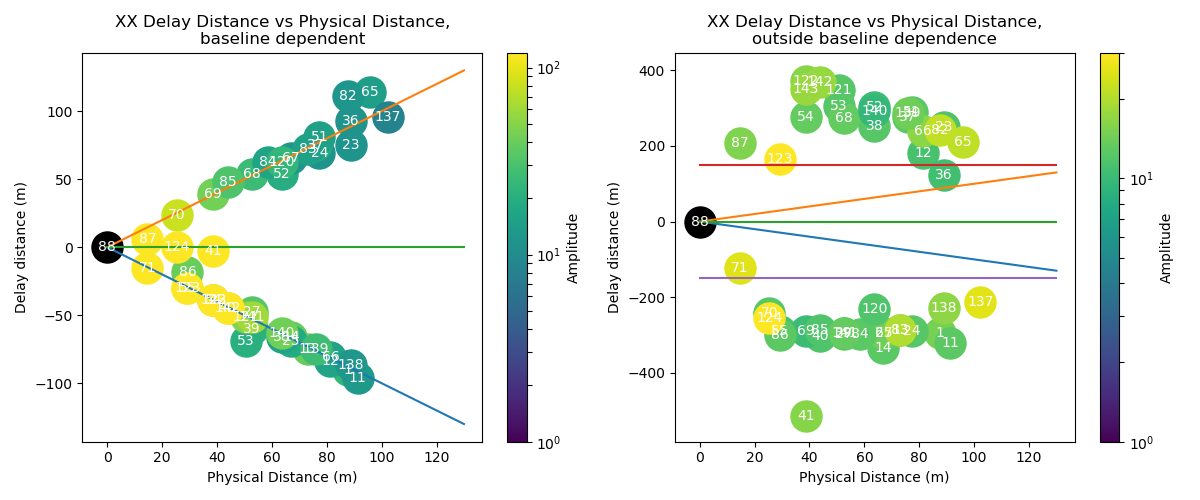

In [25]:
#Create an array which holds the baseline dependent delay times in meters
blin_delay_distance_xx = blin_ants_delay_xx * c

#Create an array which holds the baseline independent delay times in meters
ind_delay_distance_xx = ind_ants_delay_xx * c * f

#The arrays created above are passed into the function along with the amplitude array
#The index values are passed, along with the entered antenna number and uv object
#The color scales for both plots are passed through vmin and vmax
#The titles of the plots are specified
adp.plot_delay_position(amp_1 = blin_ants_amp_xx, delay_dis_1 = blin_delay_distance_xx, 
                        amp_2 = ind_ants_amp_xx, delay_dis_2 = ind_delay_distance_xx,
                        index1 = indexx, index2 = indexx_ind, uv = uvxx, antnum = focus_ant,
                        vmin1 = 1, vmax1 = 120,
                        vmin2 = 1, vmax2 = 30,
                        title1 = 'XX Delay Distance vs Physical Distance,\nbaseline dependent',
                        title2 = 'XX Delay Distance vs Physical Distance,\noutside baseline dependence')


### Part 5: YY Plots

(1035, 3)
(1035, 3)
(45, 45)
(45, 45)


<IPython.core.display.Javascript object>


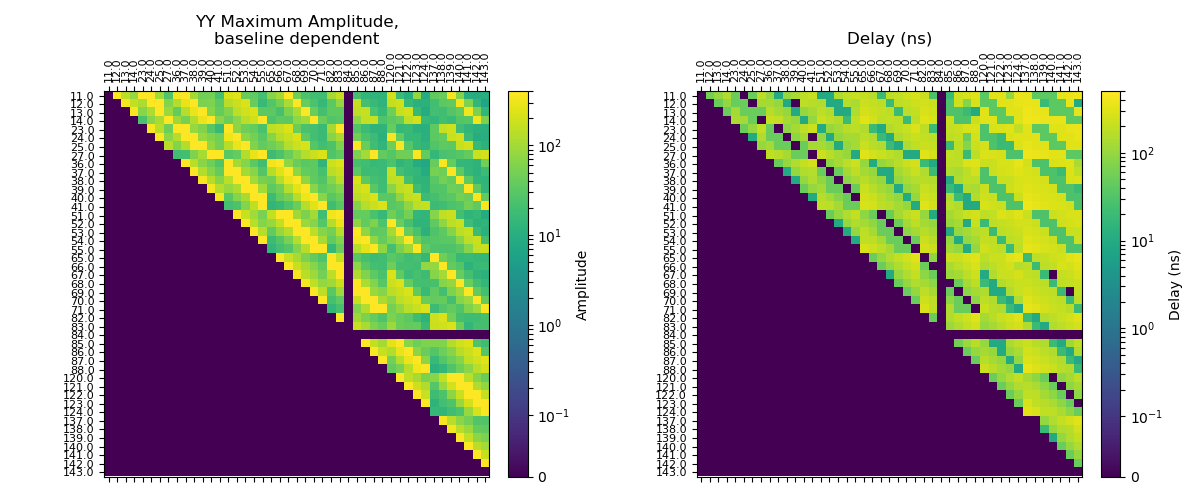

In [26]:
#Call the make_array functions to create the arrays for the baseline dependent amplitudes

#Create the arrays for the max amplitude and corresponding delay for the yy data
#The only parameter passed is the uv object
blin_amp_yy, blin_delay_yy = adp.make_blin_depd_arrays(uv = uvyy)

#Print the shape of the arrays to check that everything is working correctly
print blin_delay_yy.shape
print blin_amp_yy.shape

#Create the matrix arrays for the yy data
#The two arrays created above are passed into the function
blin_amp_matrix_yy, blin_delay_matrix_yy = adp.make_matrix_array(amp_array = blin_amp_yy, 
                                                                 delay_array = blin_delay_yy)

#Print the shape of the arrays to check that everything is working correctly
print blin_amp_matrix_yy.shape
print blin_delay_matrix_yy.shape

#The arrays created above are passed into the function
#The color scales for both plots are passed through vmin and vmax
#The titles of the plots are specified
adp.plot_matrix_array(amp_array = blin_amp_yy, amp_matrix = blin_amp_matrix_yy, delay_matrix = blin_delay_matrix_yy,
                      vmin1 = 0, vmax1 =400,
                      vmin2 = 0, vmax2 = 500,
                      title='YY Maximum Amplitude,\nbaseline dependent')

<IPython.core.display.Javascript object>


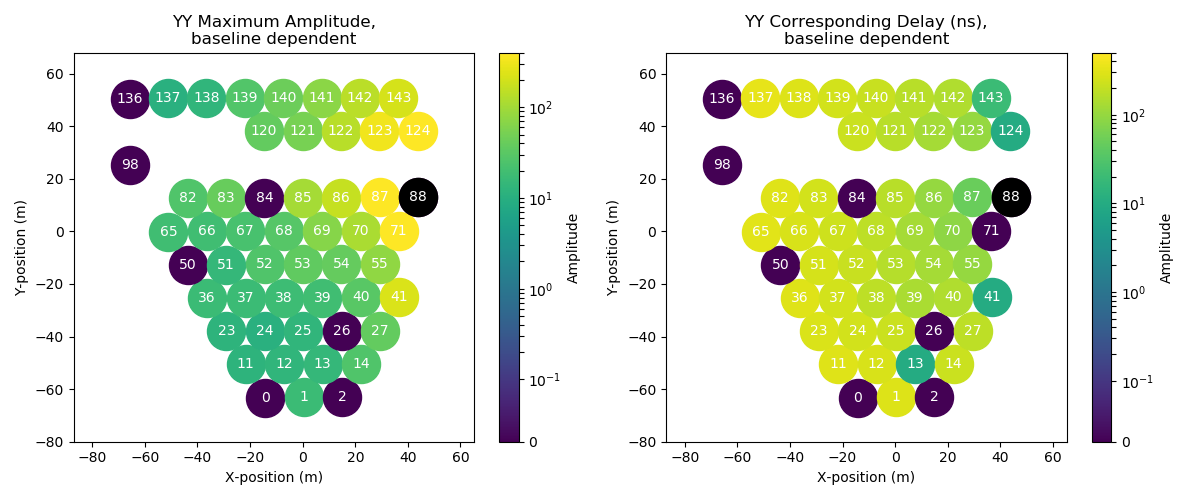

In [27]:
#Create the arrays for the maximum values and the matrix for yy, then plot

#Create the arrays for the max amplitude and corresponding delay for the yy data
#The parameters passed are the uv object and setting keep_flags to True
#By setting keep_flags to True, we keep the flagged antennas listed in the created array,
#which means we are able to plot them in position below
full_ant_amp_yy, full_ant_delay_yy = adp.make_blin_depd_arrays(uv = uvyy, keep_flags=True)

#Create the matrix arrays for the yy data
#The two arrays created above are passed into the function
#The antenna entered by the user is passed in
#Index is set to true, which means the array index numbers for the given antenna are returned
#index = index number for the amplitude array
#dindex = index number for the delay array
blin_ants_amp_yy, blin_ants_delay_yy, indeyy, dindeyy = adp.make_matrix_array(amp_array = full_ant_amp_yy, 
                                                                              delay_array = full_ant_delay_yy, 
                                                                              antnum = focus_ant, index = True)

#The arrays created above are passed into the function
#The index and delay index values are passed
#The uv object is passed along with the entered antenna number
#The color scales for for both plots are passed through vmin and vmax
#The titles of the plots are specified
adp.plot_position_array(amp_array = blin_ants_amp_yy, delay_array = blin_ants_delay_yy,
                        index = indeyy, dindex = dindeyy, uv = uvyy, antnum = focus_ant,
                        vmin1 = 0, vmax1 = 400,
                        vmin2 = 0, vmax2 = 500,
                        title1 = 'YY Maximum Amplitude,\nbaseline dependent',
                        title2 = 'YY Corresponding Delay (ns),\nbaseline dependent')

(1035, 3)
(1035, 3)
(45, 45)
(45, 45)


<IPython.core.display.Javascript object>


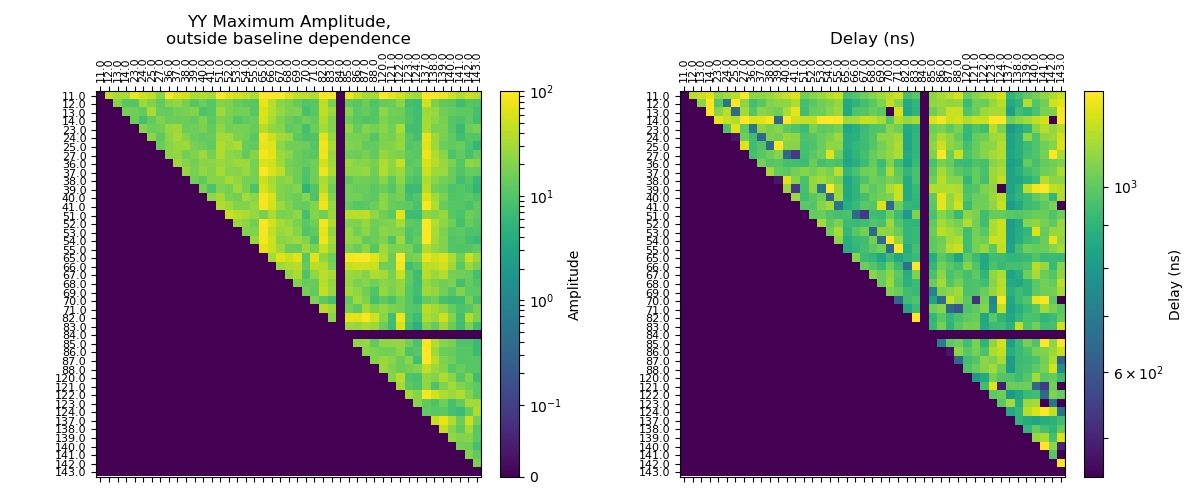

In [28]:
#Initialize the arrays for the baseline independent amplitudes of the yy data and the corresponding delay
#The only parameter passed is the uv object
ind_amp_yy,ind_delay_yy = adp.make_blin_ind_arrays(uv = uvyy)

#Print the shape of the arrays to verify that the function worked properly
print ind_delay_yy.shape
print ind_amp_yy.shape

#Initialize the matrix arrays of the yy data
#The arrays created above are passed into the function 
ind_amp_matrix_yy, ind_delay_matrix_yy = adp.make_matrix_array(amp_array = ind_amp_yy, delay_array = ind_delay_yy)

#Print the shape of the arrays to verify that the function worked properly
print ind_amp_matrix_yy.shape
print ind_delay_matrix_yy.shape

#The arrays created above are passed into the function
#The color scales for both plots are passed through vmin and vmax
#The title of the plot is specified
adp.plot_matrix_array(amp_array = ind_amp_yy, amp_matrix = ind_amp_matrix_yy, delay_matrix = ind_delay_matrix_yy,
                      vmin1 = 0, vmax1 = 100,
                      vmin2 = 450, vmax2 = 1300, 
                      title = 'YY Maximum Amplitude,\noutside baseline dependence')

<IPython.core.display.Javascript object>


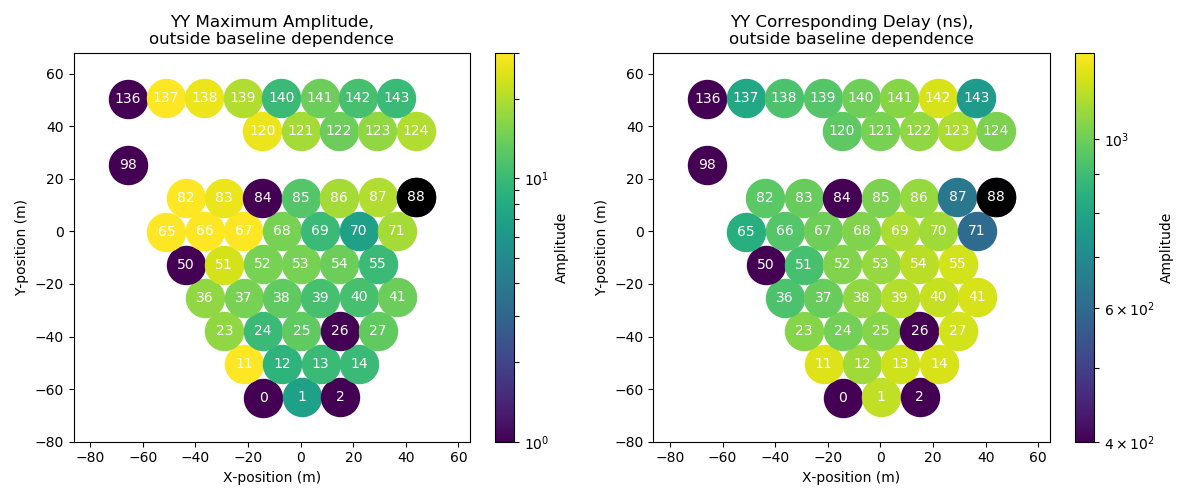

In [29]:
#Create the arrays for the max amplitude and corresponding delay for the baseline independent yy data
#The parameters passed are the uv object and setting keep_flags to True
#By setting keep_flags to True, we keep the flagged antennas listed in the created array,
#which means we are able to plot them in position below
full_ant_ind_amp_yy, full_ant_ind_delay_yy = adp.make_blin_ind_arrays(uv = uvyy, keep_flags=True)

#Create the matrix arrays for the yy data
#The two arrays created above are passed into the function
#The antenna entered by the user is passed in
#Index is set to true, which means the array index numbers for the given antenna are returned
#index = index number for the amplitude array
#dindex = index number for the delay array
ind_ants_amp_yy, ind_ants_delay_yy, indeyy_ind, dindeyy_ind = adp.make_matrix_array(amp_array = full_ant_ind_amp_yy,
                                                                                    delay_array = full_ant_ind_delay_yy,
                                                                                    antnum = focus_ant, index = True)

#The arrays created above are passed into the function
#The index and delay index values are passed
#The uv object is passed along with the entered antenna number
#The color scales for for both plots are passed through vmin and vmax
#The titles of the plots are specified
adp.plot_position_array(amp_array = ind_ants_amp_yy, delay_array = ind_ants_delay_yy,
                        index = indeyy_ind, dindex = dindeyy_ind, uv = uvyy, antnum = focus_ant,
                        vmin1 = 1, vmax1 = 30,
                        vmin2 = 400, vmax2 = 1300,  
                        title1 = 'YY Maximum Amplitude,\noutside baseline dependence',
                        title2 = 'YY Corresponding Delay (ns),\noutside baseline dependence')

<IPython.core.display.Javascript object>


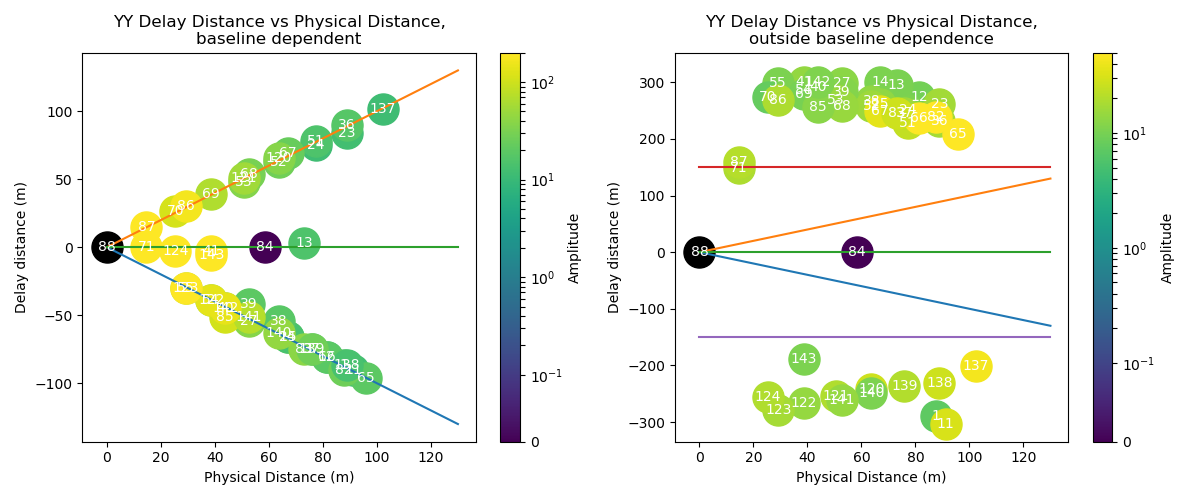

In [30]:
#Create an array which holds the baseline dependent delay times in meters
blin_delay_distance_yy = blin_ants_delay_yy * c

#Create an array which holds the baseline independent delay times in meters
ind_delay_distance_yy = ind_ants_delay_yy * c * f

#The arrays created above are passed into the function along with the amplitude array
#The index values are passed, along with the entered antenna number and uv object
#The color scales for both plots are passed through vmin and vmax
#The titles of the plots are specified
adp.plot_delay_position(amp_1 = blin_ants_amp_yy, delay_dis_1 = blin_delay_distance_yy,
                        amp_2 = ind_ants_amp_yy, delay_dis_2 = ind_delay_distance_yy,
                        index1 = indeyy, index2 = indeyy_ind, uv = uvyy, antnum = focus_ant,
                        vmin1 = 0, vmax1 = 200,
                        vmin2 = 0, vmax2 = 50,
                        title1 = 'YY Delay Distance vs Physical Distance,\nbaseline dependent',
                        title2 = 'YY Delay Distance vs Physical Distance,\noutside baseline dependence')


### Part 6: Movies
As interesting as all of these plots are, it can be tiring going through and rerunning the code for every antenna you want to take a look at. It would be helpful to be able to make a movie of the plots which cycles through each antenna as the "focus antenna".

The script below saves out the plots as pngs and can be modified to specify which polarization and dependence you would like to run.

After all of the pngs have been saved, the following command can be entered into the command line to create the movie: 
ffmpeg -framerate 2 -pattern_type glob -i '∗∗.png' -c:v libx264 -pix_fmt yuv420p out.mp4

In [31]:
"""
for focus_ant in ants:
    #Create the arrays for the maximum values and the matrix for xy
    #full_ant_amp_yy, full_ant_delay_yy = adp.make_blin_depd_arrays(uv = uvxy, keep_flags=True)
    ind_ants_amp_xx, ind_ants_delay_xx, indeyx_ind, dindeyx_ind = adp.make_matrix_array(amp_array = full_ant_ind_amp_yy, 
                                                                              delay_array = full_ant_ind_delay_yy, 
                                                                              antnum = focus_ant, index = True)

    adp.plot_position_array(amp_array = ind_ants_amp_xx, delay_array = ind_ants_delay_xx,
                        index = indeyx_ind, dindex = dindeyx_ind, uv = uvyy,
                        vmin1 = 1, vmax1 = 90,
                        vmin2 = 450, vmax2 = 1200,
                        title1 = 'YY Maximum Amplitude,\noutside baseline dependence',
                        title2 = 'YY Corresponding Delay (ns),\noutside baseline dependence')

    if len(str(focus_ant))==1:
        imname = '00' + str(focus_ant) + '_yy.png'
    elif len(str(focus_ant))==2:
        imname = '0' + str(focus_ant) + '_yy.png'
    else: 
        imname = str(focus_ant) + '_yy.png'
    plt.savefig('/data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/ant_array_imgs/yy_blin_ind_imgs2/'+imname)
"""

"\nfor focus_ant in ants:\n    #Create the arrays for the maximum values and the matrix for xy\n    #full_ant_amp_yy, full_ant_delay_yy = adp.make_blin_depd_arrays(uv = uvxy, keep_flags=True)\n    ind_ants_amp_xx, ind_ants_delay_xx, indeyx_ind, dindeyx_ind = adp.make_matrix_array(amp_array = full_ant_ind_amp_yy, \n                                                                              delay_array = full_ant_ind_delay_yy, \n                                                                              antnum = focus_ant, index = True)\n\n    adp.plot_position_array(amp_array = ind_ants_amp_xx, delay_array = ind_ants_delay_xx,\n                        index = indeyx_ind, dindex = dindeyx_ind, uv = uvyy,\n                        vmin1 = 1, vmax1 = 90,\n                        vmin2 = 450, vmax2 = 1200,\n                        title1 = 'YY Maximum Amplitude,\noutside baseline dependence',\n                        title2 = 'YY Corresponding Delay (ns),\noutside baseline dependence')\n

### Part 7: Other Plots

We've looked at the main plots we had been interested in, but there are a few more plots we would like to look at. 

#### Delay Spectra

The first plots we look at are the delay spectra for all four polarizations. This allows us to look more closely at the amplitudes and delays side by side. It also acts as a good check that the numbers we are plotting above make sense. 

In [40]:
#Create the delay spectrum for all four polarizations

#Select which antenna pair we will look at
ant1 = 11
ant2 = 65

#Start with the YY data
visyy = uvyy.get_data(ant1,ant2)
print visyy.shape

# 1) Fourier transform "vis_avg" along the freq axis
vis_avg_delayy = np.fft.fftshift(np.fft.fft(np.mean(visyy,axis=0)))
print vis_avg_delayy.shape

# 2) Find the frequency width of a channel in GHz
freq_widthyy = np.diff(uvyy.freq_array[0,:])[0]
print freq_widthyy

# 3) Convert frequencies to delays and convert to ns. Numpy's fftfreq function takes two arguments:
#    the number of frequencies, and the frequency width you calculated above
delaysyy = np.fft.fftshift(np.fft.fftfreq(uvyy.Nfreqs,freq_widthyy))*1e9
print delaysyy.shape

#Print the maximum peak of the spectrum and the corresponding delay
print 'The maximum peak for yy:', np.max(np.abs(vis_avg_delayy))
print 'The corresponding delay:', delays[np.argmax(np.abs(vis_avg_delayy))]

#Next is the XX data
visxx = uvxx.get_data(ant1,ant2)
print visxx.shape

# 1) Fourier transform "vis_avg" along the freq axis
vis_avg_delayxx = np.fft.fftshift(np.fft.fft(np.mean(visxx,axis=0)))
print vis_avg_delayxx.shape

# 2) Find the frequency width of a channel in GHz
freq_widthxx = np.diff(uvxx.freq_array[0,:])[0]
print freq_widthxx

# 3) Convert frequencies to delays and convert to ns. Numpy's fftfreq function takes two arguments:
#    the number of frequencies, and the frequency width you calculated above
delaysxx = np.fft.fftshift(np.fft.fftfreq(uvxx.Nfreqs,freq_widthxx))*1e9
print delaysxx.shape

#Print the maximum peak of the spectrum and the corresponding delay
print 'The maximum peak for xx:', np.max(np.abs(vis_avg_delayxx))
print 'The corresponding delay:', delaysxx[np.argmax(np.abs(vis_avg_delayxx))]

#Next is the XY data
visxy = uvxy.get_data(ant1,ant2)
print visxy.shape

# 1) Fourier transform "vis_avg" along the freq axis
vis_avg_delayxy = np.fft.fftshift(np.fft.fft(np.mean(visxy,axis=0)))
print vis_avg_delayxy.shape

# 2) Find the frequency width of a channel in GHz
freq_widthxy = np.diff(uvxy.freq_array[0,:])[0]
print freq_widthxy

# 3) Convert frequencies to delays and convert to ns. Numpy's fftfreq function takes two arguments:
#    the number of frequencies, and the frequency width you calculated above
delaysxy = np.fft.fftshift(np.fft.fftfreq(uvxy.Nfreqs,freq_widthxy))*1e9
print delaysxy.shape

#Print the maximum peak of the spectrum and the corresponding delay
print 'The maximum peak for xy:', np.max(np.abs(vis_avg_delayxy))
print 'The corresponding delay:', delaysxy[np.argmax(np.abs(vis_avg_delayxy))]

#Finally, the YX data
visyx = uvyx.get_data(ant1,ant2)
print visyx.shape

# 1) Fourier transform "vis_avg" along the freq axis
vis_avg_delayyx = np.fft.fftshift(np.fft.fft(np.mean(visyx,axis=0)))
print vis_avg_delayyx.shape

# 2) Find the frequency width of a channel in GHz
freq_widthyx = np.diff(uvyx.freq_array[0,:])[0]
print freq_widthyx

# 3) Convert frequencies to delays and convert to ns. Numpy's fftfreq function takes two arguments:
#    the number of frequencies, and the frequency width you calculated above
delaysyx = np.fft.fftshift(np.fft.fftfreq(uvyx.Nfreqs,freq_widthyx))*1e9
print delaysyx.shape

#Print the maximum peak of the spectrum and the corresponding delay
print 'The maximum peak for yx:', np.max(np.abs(vis_avg_delayyx))
print 'The corresponding delay:', delaysxy[np.argmax(np.abs(vis_avg_delayyx))]

(1, 1024)
(1024,)
97656.25
(1024,)
The maximum peak for yy: 262.37985
The corresponding delay: 4170.0
(1, 1024)
(1024,)
97656.25
(1024,)
The maximum peak for xx: 119.68561
The corresponding delay: -200.0
(1, 1024)
(1024,)
97656.25
(1024,)
The maximum peak for xy: 101.75357
The corresponding delay: -979.9999999999999
(1, 1024)
(1024,)
97656.25
(1024,)
The maximum peak for yx: 167.99756
The corresponding delay: -920.0


<IPython.core.display.Javascript object>


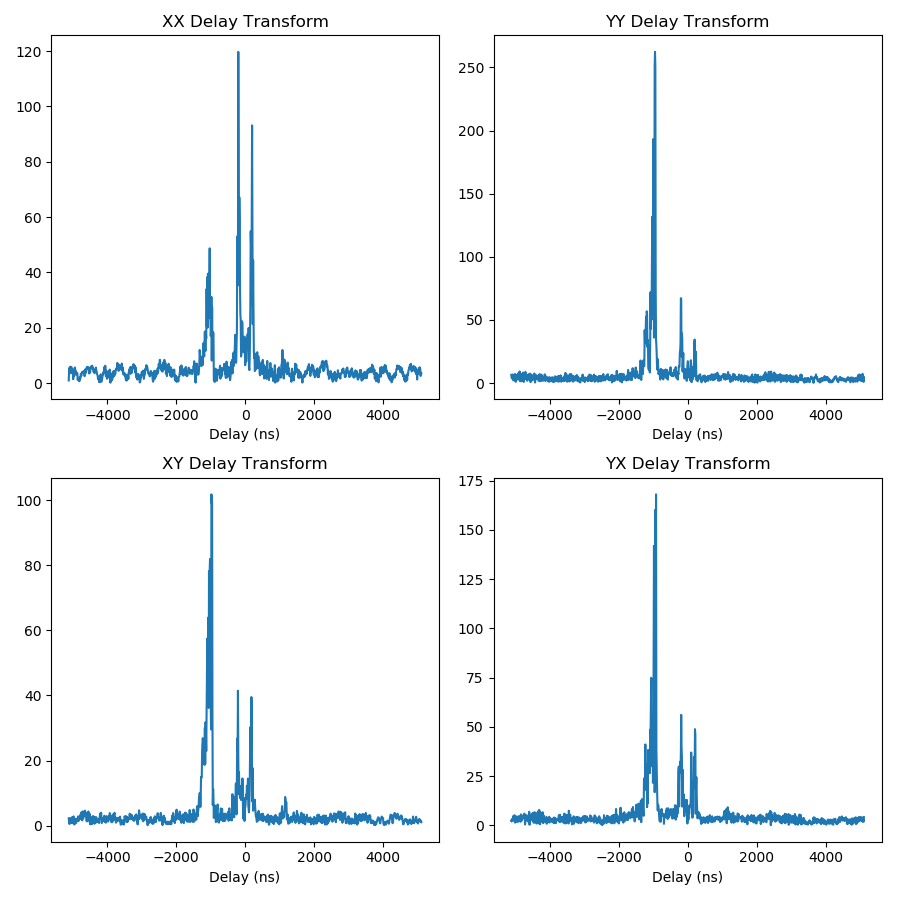

In [41]:
#Plot the four delay spectra together
plt.figure(figsize=(9,9))

plt.subplot(221)
plt.plot(delaysxx,np.abs(vis_avg_delayxx))
plt.xlabel('Delay (ns)')
#plt.xlim(-900,-120) # zoom-in
#plt.ylim(-20,460)
plt.title('XX Delay Transform')

plt.subplot(222)
plt.plot(delaysyy,np.abs(vis_avg_delayy))
plt.xlabel('Delay (ns)')
#plt.xlim(-900,-120) # zoom-in
#plt.ylim(0,600)
plt.title('YY Delay Transform')


plt.subplot(223)
plt.plot(delaysxy,np.abs(vis_avg_delayxy))
plt.xlabel('Delay (ns)')
#plt.xlim(-900,-120) # zoom-in
#plt.ylim(-35,770)
plt.title('XY Delay Transform')

plt.subplot(224)
plt.plot(delaysyx,np.abs(vis_avg_delayyx))
plt.xlabel('Delay (ns)')
#plt.xlim(-900,-120) # zoom-in
#plt.ylim(0,600)
plt.title('YX Delay Transform')

plt.tight_layout()

#### Other plots

Create waterfall plots of the Delay vs Baseline Index

<IPython.core.display.Javascript object>


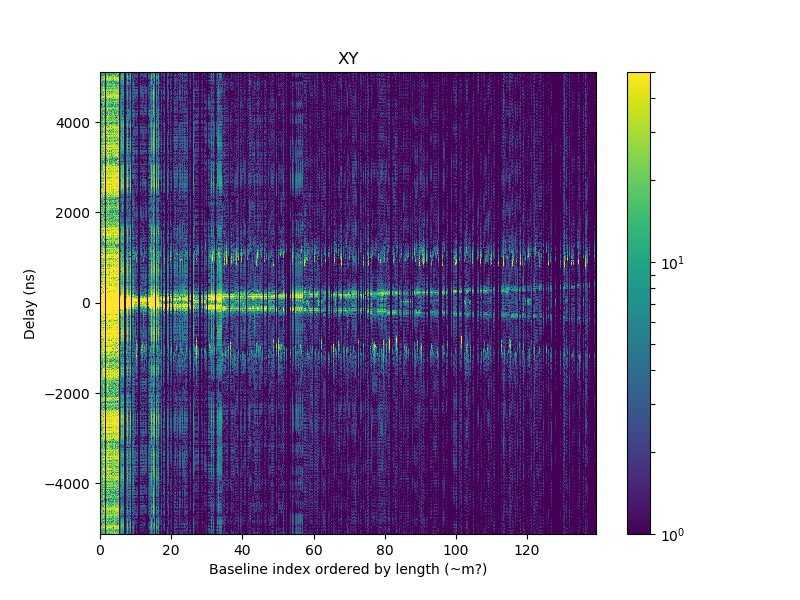

((1024, 1378), (1024, 1378), (1024, 1378))


In [34]:
#Plot the xy data

blin_len = np.sqrt(np.diag(np.dot(uvxy.uvw_array, uvxy.uvw_array.T)))
blins_inds = np.argsort(blin_len)

uvxy_delay = np.fft.fft(uvxy.data_array,axis=2).squeeze()

uvxy_delay = uvxy_delay[blins_inds].T

freq_width = np.diff(uvxy.freq_array[0,:])[0]

delays = np.fft.fftfreq(uvxy.Nfreqs,freq_width)*1e9
plt.figure(figsize=(8,6))
BL_LENGTHS,DELAYS = np.meshgrid(blin_len,np.fft.fftshift(delays))
print(BL_LENGTHS.shape,DELAYS.shape,uvxy_delay.shape)
plt.imshow(np.abs(np.fft.fftshift(uvxy_delay,axes=0)),
               aspect='auto',norm=SymLogNorm(vmin=1,vmax=50,linthresh=0.2),
               extent=(blin_len.min(),blin_len.max(),delays.min(),delays.max()))
plt.xlabel('Baseline index ordered by length (~m?)')
plt.ylabel('Delay (ns)')
plt.title('XY')
plt.colorbar()

<IPython.core.display.Javascript object>


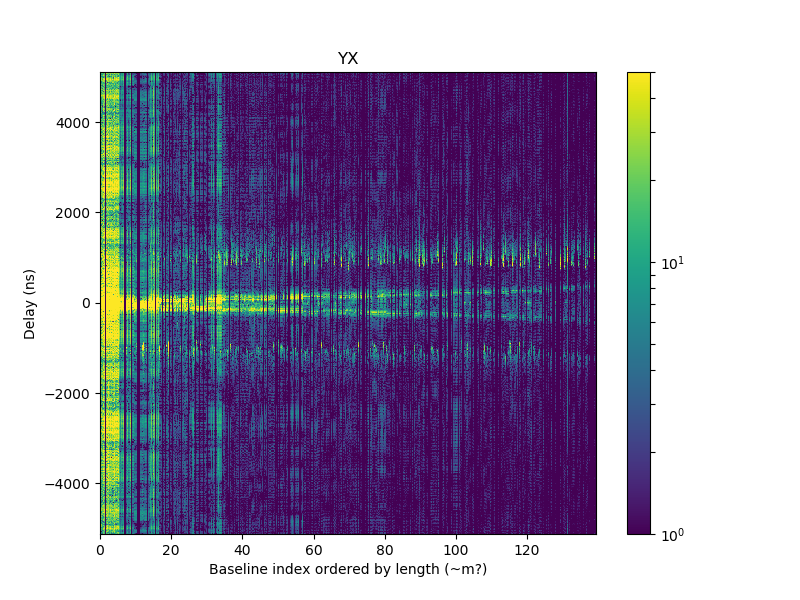

((1024, 1378), (1024, 1378), (1024, 1378))


In [35]:
#Plot the yx data

blin_len_yx = np.sqrt(np.diag(np.dot(uvyx.uvw_array, uvyx.uvw_array.T)))
blins_inds_yx = np.argsort(blin_len_yx)

uvyx_delay = np.fft.fft(uvyx.data_array,axis=2).squeeze()

uvyx_delay = uvyx_delay[blins_inds_yx].T

freq_widthyx = np.diff(uvyx.freq_array[0,:])[0]

delays_yx = np.fft.fftfreq(uvyx.Nfreqs,freq_widthyx)*1e9
plt.figure(figsize=(8,6))
BL_LENGTHS_YX,DELAYS_YX = np.meshgrid(blin_len_yx,np.fft.fftshift(delays_yx))
print(BL_LENGTHS_YX.shape,DELAYS_YX.shape,uvyx_delay.shape)
plt.imshow(np.abs(np.fft.fftshift(uvyx_delay,axes=0)),
               aspect='auto',norm=SymLogNorm(vmin=1,vmax=50,linthresh=0.2),
               extent=(blin_len_yx.min(),blin_len_yx.max(),delays_yx.min(),delays_yx.max()))
plt.xlabel('Baseline index ordered by length (~m?)')
plt.ylabel('Delay (ns)')
plt.title('YX')
plt.colorbar()

<IPython.core.display.Javascript object>


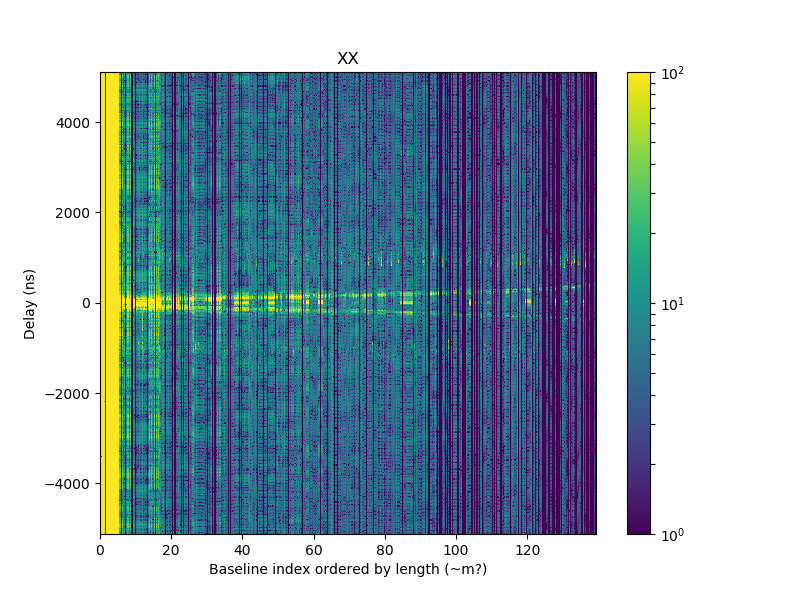

((1024, 1378), (1024, 1378), (1024, 1378))


In [45]:
#Plot the xx data

blin_len_xx = np.sqrt(np.diag(np.dot(uvxx.uvw_array, uvxx.uvw_array.T)))
blins_inds_xx = np.argsort(blin_len_xx)

uvxx_delay = np.fft.fft(uvxx.data_array,axis=2).squeeze()

uvxx_delay = uvxx_delay[blins_inds_xx].T

freq_widthxx = np.diff(uvxx.freq_array[0,:])[0]

delays_xx = np.fft.fftfreq(uvxx.Nfreqs,freq_widthxx)*1e9
plt.figure(figsize=(8,6))
BL_LENGTHS_XX,DELAYS_XX = np.meshgrid(blin_len_xx,np.fft.fftshift(delays_xx))
print(BL_LENGTHS_XX.shape,DELAYS_XX.shape,uvxx_delay.shape)
plt.imshow(np.abs(np.fft.fftshift(uvxx_delay,axes=0)),
               aspect='auto',norm=SymLogNorm(vmin=1,vmax=100,linthresh=0.2),
               extent=(blin_len_xx.min(),blin_len_xx.max(),delays_xx.min(),delays_xx.max()))
plt.xlabel('Baseline index ordered by length (~m?)')
plt.ylabel('Delay (ns)')
plt.title('XX')
plt.colorbar()

<IPython.core.display.Javascript object>


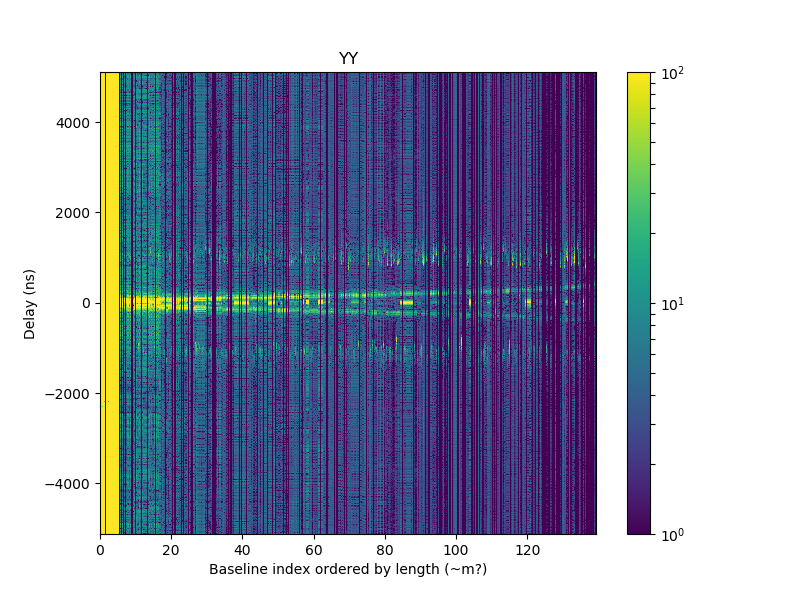

((1024, 1378), (1024, 1378), (1024, 1378))


In [46]:
#Plot the yy data

blin_len_yy = np.sqrt(np.diag(np.dot(uvyy.uvw_array, uvyy.uvw_array.T)))
blins_inds_yy = np.argsort(blin_len_yy)

uvyy_delay = np.fft.fft(uvyy.data_array,axis=2).squeeze()

uvyy_delay = uvyy_delay[blins_inds_yy].T

freq_widthyy = np.diff(uvyy.freq_array[0,:])[0]

delays_yy = np.fft.fftfreq(uvyy.Nfreqs,freq_widthyy)*1e9
plt.figure(figsize=(8,6))
BL_LENGTHS_YY,DELAYS_YY = np.meshgrid(blin_len_yy,np.fft.fftshift(delays_yy))
print(BL_LENGTHS_YY.shape,DELAYS_YY.shape,uvyy_delay.shape)
plt.imshow(np.abs(np.fft.fftshift(uvyy_delay,axes=0)),
               aspect='auto',norm=SymLogNorm(vmin=1,vmax=100,linthresh=0.2),
               extent=(blin_len_yy.min(),blin_len_yy.max(),delays_yy.min(),delays_yy.max()))
plt.xlabel('Baseline index ordered by length (~m?)')
plt.ylabel('Delay (ns)')
plt.title('YY')
plt.colorbar()